In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([
                                                                                    transforms.ToTensor()
                                      ]))

test = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))



Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [0]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [4]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [5]:
trainset

In [6]:
import numpy as np
print(trainset.batch_size)
print(len(trainset))
for i, data in enumerate(trainset):
  print(i, type(data))
  print(len(data))
  print(len(data[0]), len(data[1]))
  break

10
6000
0 <class 'list'>
2
10 10


In [0]:
X, y = data[0][0], data[1][0]

In [8]:
print(data[1])

tensor([0, 7, 6, 9, 1, 4, 2, 6, 6, 5])


(1, 28, 28)


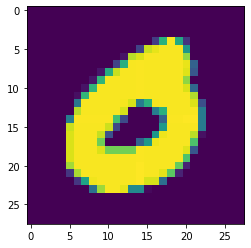

In [9]:
print(np.array(data[0][0]).shape)

import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28, 28))
plt.show()

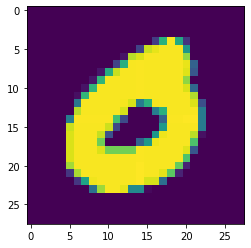

In [10]:
plt.imshow(data[0][0].squeeze())
plt.show()

In [11]:
data[0][0][0][10]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0510, 0.6549,
        0.9922, 0.9922, 0.9922, 0.9922, 0.9922, 0.9961, 0.9922, 0.9922, 0.9922,
        0.9922, 0.9922, 0.9451, 0.3373, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

In [12]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total += 1

print(counter_dict)

for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100.0}%")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [14]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()

net = Net()
print(net)   

Net()


In [15]:
class a:
  def __init__(self):
    print("initializing a")
  
class b(a):
  def __init__(self):
    print("initializing b")

class c(a):
  def __init__(self):
    super().__init__()
    print("initializing c")

b_ob = b()

initializing b


In [16]:
c_ob = c()

initializing a
initializing c


In [17]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)
  
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [18]:
X = torch.randn((28, 28))
X.shape

torch.Size([28, 28])

In [19]:
X = X.view(-1, 28*28)
X.shape

torch.Size([1, 784])

In [20]:
output = net(X)
output

tensor([[-2.1956, -2.4485, -2.2302, -2.2843, -2.3493, -2.3335, -2.2464, -2.3332,
         -2.3733, -2.2575]], grad_fn=<LogSoftmaxBackward>)

In [0]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

For one_hot vectors, I tend to use mean squared error.

For these scalar classifications, I use cross entropy.

In [22]:
for epoch in range(3):  # 3full passes over the data
  for data in trainset: # `data` is a batch of data
    X, y = data # X is the batch of features, y is the batch of targets
    net.zero_grad() # sets gradients to 0 before loss calc. You will do this likely every step.
    output = net(X.view(-1, 28*28)) # pass in the reshaped batch (recall they are 28*28 atm)
    loss = loss_function(output, y) # F.nll_loss(output, y) # calc and grab the loss value 
    loss.backward() # apply this loss backwards thru the network's parameters
    optimizer.step()  # attempt to optimize weights to account for loss/gradients
  print(loss)

tensor(0.0107, grad_fn=<NllLossBackward>)
tensor(0.9930, grad_fn=<NllLossBackward>)
tensor(0.0051, grad_fn=<NllLossBackward>)


In [23]:
correct = 0
total = 0

with torch.no_grad():
  for data in testset:
    X, y = data
    output = net(X.view(-1, 784))
    for idx, o in enumerate(output):
      print(torch.argmax(o), y[idx])
      if torch.argmax(o) == y[idx]:
        correct += 1
      total += 1
  
print("Accuracy: ", round(correct/total, 3))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
tensor(9) tensor(9)
tensor(8) tensor(8)
tensor(4) tensor(4)
tensor(1) tensor(1)
tensor(0) tensor(0)
tensor(6) tensor(6)
tensor(0) tensor(0)
tensor(9) tensor(9)
tensor(6) tensor(6)
tensor(8) tensor(8)
tensor(6) tensor(6)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(9) tensor(9)
tensor(8) tensor(8)
tensor(9) tensor(9)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(5) tensor(5)
tensor(5) tensor(5)
tensor(9) tensor(9)
tensor(4) tensor(4)
tensor(2) tensor(2)
tensor(1) tensor(1)
tensor(9) tensor(9)
tensor(4) tensor(4)
tensor(3) tensor(3)
tensor(9) tensor(9)
tensor(6) tensor(6)
tensor(0) tensor(0)
tensor(4) tensor(4)
tensor(0) tensor(0)
tensor(6) tensor(6)
tensor(0) tensor(0)
tensor(1) tensor(1)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(4) tensor(4)
tensor(7) tensor(7)
tensor(8) tensor(8)
tensor(9) tensor(9)
tensor(0) tensor(0)
tensor(1) tensor(1)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(4) tensor(4)
tensor(7) tensor(7)
tensor(8) tensor(8)
tens

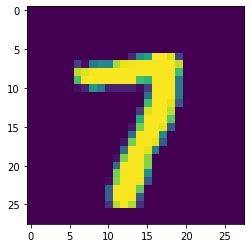

In [24]:
plt.imshow(X[0].view(28, 28))
plt.show()

In [26]:
print(torch.argmax(net(X[0].view(-1, 784))[0]))

tensor(7)


In [27]:
a_featureset = X[0]
reshaped_for_network = a_featureset.view(-1, 784)
output = net(reshaped_for_network)
first_pred = output[0]
print(first_pred)

tensor([-2.4189e+01, -1.4480e+01, -8.6701e+00, -1.2430e+01, -2.1532e+01,
        -1.8786e+01, -3.5483e+01, -1.7618e-04, -1.9769e+01, -1.7269e+01],
       grad_fn=<SelectBackward>)


In [28]:
biggest_index = torch.argmax(first_pred)
print(biggest_index)

tensor(7)
